# SVM

In [42]:
from sklearn.svm import SVC

In [15]:
clf = SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.9736842105263158
0.9568965517241379


In [158]:
import matplotlib.pyplot as plt

def plot(x, y):
    for j in np.unique(y):
        plt.scatter(x[y == j, 0], x[y == j, 1])
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
    plt.show()

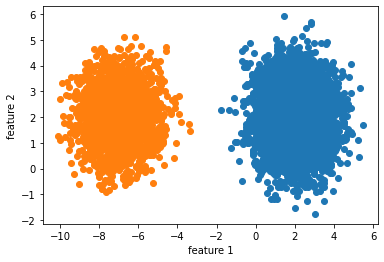

In [158]:
# data like on the left upper picture
from sklearn.model_selection import train_test_split
class0_len = 7000
X0 = np.random.normal(2, 1, (class0_len,2)) 
y0 = [0]*class0_len

class1_len = 3000
X1 = np.random.normal(2, 1, (class1_len, 2))
X1[:, 0] = -X1[:, 0] - 5
y1 = [1]*class1_len

X = np.concatenate((X0, X1))
y = y0+y1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

plot(X_train, np.array(y_train))

In [164]:
# when data is prefectly separated like this the test score is 1 despite the value of C

clf = SVC(C = 10)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
1.0


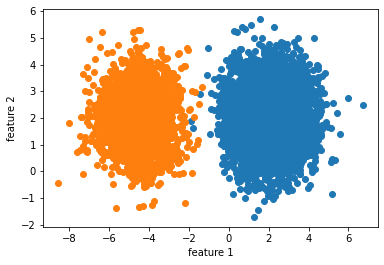

In [168]:
# data like on the left bottom picture
from sklearn.model_selection import train_test_split
class0_len = 7000
X0 = np.random.normal(2, 1, (class0_len,2)) 
y0 = [0]*class0_len

class1_len = 3000
X1 = np.random.normal(2, 1, (class1_len, 2))
X1[:, 0] = -X1[:, 0] - 2.5
y1 = [1]*class1_len

X = np.concatenate((X0, X1))
y = y0+y1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

plot(X_train, np.array(y_train))

In [172]:
# when C is <0.001 we get not very good results however, but C more than that threshold the test score goes to 1

clf = SVC(C = 0.0001)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.6998666666666666
0.7004


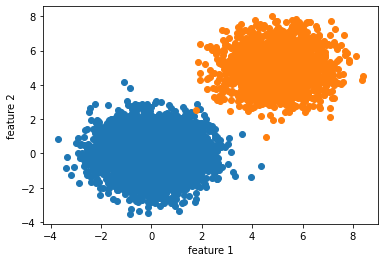

In [173]:
# data like on the right upper picture
class0_len = 7000
X0 = np.random.normal(0, 1, (class0_len,2))
y0 = [0]*class0_len

class1_len = 3000
X1 = np.random.normal(5, 1, (class1_len, 2))
y1 = [1]*class1_len

X = np.concatenate((X0, X1))
y = y0+y1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
plot(X_train, np.array(y_train))

In [180]:
# for big C-s we get test score 1

clf = SVC(C = 300)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9998666666666667
1.0


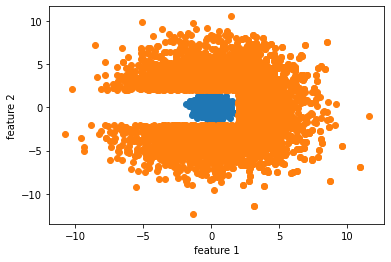

In [361]:
# data like on the right upper picture
class0_len = 3000
X0 = np.random.normal(0, 1/2, (class0_len,2))
y0 = [0]*class0_len

class1_len = 7000
X1 = np.random.normal(0, 3, (class1_len, 2))

mask_array1 = X1[:, 1] > 2
mask_array2 = X1[:, 0] > 2
mask_array3 = X1[:, 1] < -2

X1 = np.concatenate((X1[mask_array1],X1[mask_array2],X1[mask_array3]))

y1 = [1]*len(X1) 

X = np.concatenate((X0, X1))
y = y0+y1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
plot(X, np.array(y))

In [371]:
# taking bigger C-s <0.01 the score gets signuficantly better, then the improvement is slowing down, there is an optimal C after which the score is going slowly down

clf = SVC(C = 1000)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9998392024441228
0.9995178399228544


<img src="files/svm.png">

Try to generate datasets like this, fit SVM on each of them and find best regularization parameter for each (use CV).

Dataset settings
- 2 features
- not more than 10k points (or you will probably struggle)
- you can either try generating from distributions, and maybe removing some elements after 
- or you can just generate by some functions, this would be easier, but it is OK